In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from joblib import dump, load

ModuleNotFoundError: No module named 'hrv'

In [5]:
dataTrain = np.loadtxt("train.txt")
#data1 = np.load('E:\hoc\dtvt\20182-me\ML\data\test_data - Copy.npy', mmap_mode='r')  
# data1 = dataTrain[0:599,:]
# data2 = dataTrain[600:1199,:]
# data3 = dataTrain[1200:1799,:]
# data4 = dataTrain[1800:2399,:]
# data5 = dataTrain[2400:2999,:]
data1 = dataTrain[0:600,:]
data2 = dataTrain[600:1200,:]
data3 = dataTrain[1200:1800,:]
data4 = dataTrain[1800:2400,:]
data5 = dataTrain[2400:3000,:]
print(data1.shape)
# print(data2.shape)
# print(data3.shape)
# print(data4.shape)
# print(data5.shape)

(833, 10801)
(1253, 10801)
(902, 10801)
(935, 10801)
(1105, 10801)


In [6]:
def train(training_data, testing_data, training_label, testing_label, hidden_layer, activation,alpha):
    
    #model
    model = MLPClassifier(solver='sgd', alpha=alpha, activation = activation, hidden_layer_sizes=(hidden_layer),max_iter=900)
    # solver='lbfgs': optimizer in the family of quasi-Newton methods.
    #alpha : L2 penalty (regularization term) parameter.
    model.fit(X=training_data, y=training_label) #train
    prediction = model.predict(testing_data)
    accuracy = accuracy_score(prediction, testing_label)
    loss = model.loss_
    iteration = model.n_iter_
    return accuracy, loss, iteration

def kfold(d1, d2, d3, d4, d5, l1, l2, l3, l4, l5, hidden_layer, activation,alpha):
    #fold 1
    training1 = np.concatenate((d2, d3, d4, d5), axis=0)
    training_label1 = np.concatenate((l2, l3, l4, l5), axis=0)
    accuracy1, loss1, iteration1 = train(training1, d1, training_label1, l1, hidden_layer, activation,alpha)
    #print("accuracy:", accuracy1, "loss", loss1, "iteration", iteration1)

    #fold 2
    training2 = np.concatenate((d1, d3, d4, d5), axis=0)
    training_label2 = np.concatenate((l1, l3, l4, l5), axis=0)
    accuracy2, loss2, iteration2 = train(training2, d2, training_label2, l2, hidden_layer, activation,alpha)
    #print("accuracy:", accuracy2, "loss", loss2, "iteration", iteration2)

    #fold 3
    training3 = np.concatenate((d2, d1, d4, d5), axis=0)
    training_label3 = np.concatenate((l2, l1, l4, l5), axis=0)
    accuracy3, loss3, iteration3 = train(training3, d3, training_label3, l3, hidden_layer, activation,alpha)
    #print("accuracy:", accuracy3, "loss", loss3, "iteration", iteration3)
    #end

    #fold 4
    training4 = np.concatenate((d2, d3, d1, d5), axis=0)
    training_label4 = np.concatenate((l2, l3, l1, l5), axis=0)
    accuracy4, loss4, iteration4 = train(training4, d4, training_label4, l4, hidden_layer, activation,alpha)
    #print("accuracy:", accuracy4, "loss", loss4, "iteration", iteration4)

    #fold 5
    training5 = np.concatenate((d2, d3, d4, d1), axis=0)
    training_label5 = np.concatenate((l2, l3, l4, l1), axis=0)
    accuracy5, loss5, iteration5 = train(training5, d5, training_label5, l5, hidden_layer, activation,alpha)
    #print("accuracy:", accuracy5, "loss", loss5, "iteration", iteration5)
    
    accuracy_average = (accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5)/5
    return accuracy_average

def modelSelection(list_learnRate, list_hidden, d1, d2, d3, d4, d5,list_alpha):
    
    #create features
    training1, label1 = create_features(d1, 360)
    training2, label2 = create_features(d2, 360)
    training3, label3 = create_features(d3, 360)
    training4, label4 = create_features(d4, 360)
    training5, label5 = create_features(d5, 360)
    
    best_activation = ""
    g_accuracy = 0
    best_hidden = list_hidden[0]
    best_alpha = list_alpha[0]
    i = 0
    for activation in list_activation:
        for hidden_layer in list_hidden:
            for alpha in list_alpha:
                accuracy = kfold(training1, training2, training3, training4, training5, label1, label2, label3, label4, label5, hidden_layer, activation,alpha)
                i = i+1
                if(accuracy > g_accuracy):
                    print("ith: ", i, "accuracy: ", accuracy, "hidden_layer", hidden_layer, "activation: ", activation,"alpha: ",alpha)
                    g_accuracy = accuracy
                    best_hidden = hidden_layer
                    best_activation = activation
                    best_alpha=alpha
    return g_accuracy, best_hidden, best_activation,best_alpha
                

In [7]:
#init list_hidden
arr1 = np.linspace(30, 33, 4, dtype=int)
arr3=np.zeros((4, 3))
for i in range(arr3.shape[1]):
    arr3[:,i]= arr1
arr5=np.zeros((4, 5))
for i in range(arr5.shape[1]):
    arr5[:,i]= arr1
    
#list_activation = ['logistic', 'tanh', 'relu']
list_activation = ['relu']
#list_alpha = [0.0001 , 0.0005 , 0.009]
list_alpha = [0.0001]

In [15]:
arr1 = np.linspace(30, 33, 4, dtype=int)
arr3=np.zeros((4, 3))
for i in range(arr3.shape[1]):
    arr3[:,i]= arr1
arr5=np.zeros((4, 5))
for i in range(arr5.shape[1]):
    arr5[:,i]= arr1

3

In [8]:
#model selection
g_loss1, best_hidden1, best_activation1,best_alpha1 = modelSelection(list_activation, arr3, data1, data2, data3, data4, data5,list_alpha)
print("g_acc1: ", g_loss1, " best_hiddent1: ", best_hidden1, "best_activation1:", best_activation1,"best_alpha1:", best_alpha1)

g_loss2, best_hidden2, best_activation2,best_alpha2 = modelSelection(list_activation, arr5, data1, data2, data3, data4, data5,list_alpha)
print("g_acc2: ", g_loss2, " best_hiddent2: ", best_hidden2, "best_activation2:", best_activation2,"best_alpha2:", best_alpha2)

ith:  1 accuracy:  0.7328463121608755 hidden_layer [15 15] activation:  logistic
ith:  2 accuracy:  0.7987466594305159 hidden_layer [16 16] activation:  logistic
ith:  4 accuracy:  0.8112515112126261 hidden_layer [18 18] activation:  logistic
ith:  10 accuracy:  0.8150222395859782 hidden_layer [24 24] activation:  logistic
ith:  24 accuracy:  0.8356642173409508 hidden_layer [16 16] activation:  relu
g_acc1:  0.8356642173409508  best_hiddent1:  [16 16] best_activation1: relu
ith:  1 accuracy:  0.7851606335064687 hidden_layer [15 15 15] activation:  logistic
ith:  2 accuracy:  0.8094596291917842 hidden_layer [16 16 16] activation:  logistic
ith:  8 accuracy:  0.831338918174988 hidden_layer [22 22 22] activation:  logistic
g_acc2:  0.831338918174988  best_hiddent2:  [22 22 22] best_activation2: logistic
ith:  1 accuracy:  0.5644459067962144 hidden_layer [15 15 15 15] activation:  logistic
ith:  12 accuracy:  0.7562659977914958 hidden_layer [15 15 15 15] activation:  tanh
ith:  13 accuracy

In [9]:
#the best architechture: (23), activation: relu

#training with all data and the best architechture
# all_data = np.concatenate((data1, data2, data3, data4, data5), 0)

# all_training_data, all_label_data = create_features(all_data, 360)
all_training_data = dataTrain[:,0:10]
all_label_data= dataTrain[:,10:12]
#scaled data
scaler = StandardScaler()
scaler.fit(all_label_data)
scaled_training_features = scaler.transform(all_label_data)
    
#model
model = MLPClassifier(solver='lbfgs', alpha=5e-3, activation = "relu", hidden_layer_sizes=(23), learning_rate_init=0.01, max_iter=400)
model.fit(X=scaled_training_features, y=all_label_data)
loss = model.loss_
iteration = model.n_iter_


In [10]:
#save the model
dump(model, 'modelTrained.pkl')

['model.pkl']

In [39]:
#load the model
modelTrained = load('modelTrained.pkl')

In [40]:
#testing data
dataTest = np.loadtxt("test.txt")
# testing_data, testing_label = create_features(test_data, 360)
testing_data = dataTest[:,0:10]
testing_label= dataTest[:,10:12]
#scaled data
scaler = StandardScaler()
scaler.fit(testing_data)
scaled_testing_features = scaler.transform(testing_data)

#predict & assesment
pred = modelTrained.predict(scaled_testing_features)


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

test_accuracy = accuracy_score(testing_label, pred)
confusion_matrix = confusion_matrix(testing_label, pred)
print("testing accuracy: ", test_accuracy)
print("confusion matrix: ")
print(confusion_matrix)
print("---------------------------------------------------------------")
p_0 = 322/(322 + 48 + 49)
p_1 = 188/(188 + 2 + 22)
p_2 = 97/(97 + 27 + 9)
print("precision for label 0: ", p_0)
print("precision for label 1: ", p_1)
print("precision for label 2: ", p_2)

print("---------------------------------------------------------------")
f1_0 = 322/(322 + 2 + 9)
f1_1 = 188/(188+48+27)
f1_2 = 97/(97+22+49)

print("recall score for label 0: ", f1_0)
print("recall score for label 1: ", f1_1)
print("recall score for label 2: ", f1_2)

testing accuracy:  0.7945026178010471
confusion matrix: 
[[322   2   9]
 [ 48 188  27]
 [ 49  22  97]]
---------------------------------------------------------------
precision for label 0:  0.7684964200477327
precision for label 1:  0.8867924528301887
precision for label 2:  0.7293233082706767
---------------------------------------------------------------
recall score for label 0:  0.9669669669669669
recall score for label 1:  0.714828897338403
recall score for label 2:  0.5773809523809523


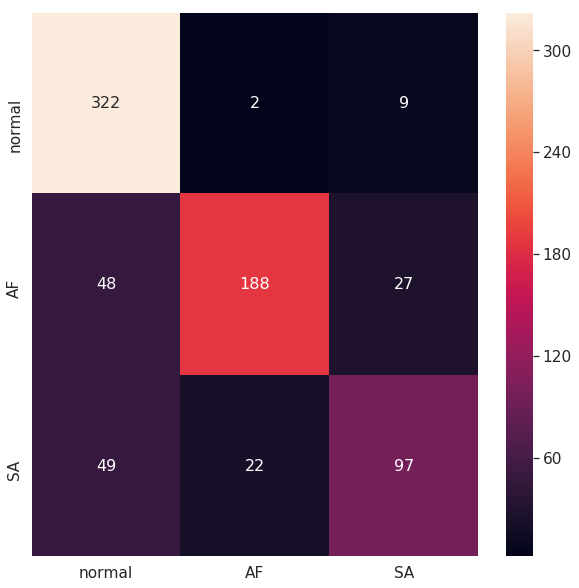

In [55]:
#visualize confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index = ['normal','AF','SA'],
                  columns = ['normal','AF','SA'])
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 16})# font size